<a href="https://colab.research.google.com/github/bananighosh/llama3-from-scratch/blob/main/llama3_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!bash download.sh

Enter the URL from email: https://download6.llamameta.net/*?Policy=eyJTdGF0ZW1lbnQiOlt7InVuaXF1ZV9oYXNoIjoiZTVrdGFxaDl2MDFkeXB6c252djJ1bzd1IiwiUmVzb3VyY2UiOiJodHRwczpcL1wvZG93bmxvYWQ2LmxsYW1hbWV0YS5uZXRcLyoiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE3MTY5MTk5OTd9fX1dfQ__&Signature=Fs0QrgTxcYJXClY9KIjPSqLZC6iCFQVSbgEuJOveIW93gv1fHHceoP18vbnOo08anexka32NSRFBSXZR-OdkvxpFXZjWvkbcxpDgfQ-XE9fEwE2SjSfjznKVnuns7-Hd13jxoxxr1abkVIAaU1NCtMkL2ogPz3s36Eza5y6HtHrjAf-Bt5LklKJS8A%7EJvRqqEenYoxMlPd72aq6hp7K8ip3SGFH9PdFgS8Lh%7EOrFd6651xulh1RiaqBeFOd45qom1hPu5bHYidneFLPyDr6o2b-eZKNV0Bp8ixG0YJyhXkB%7Egy7u6oe3jdN5j31LxTeWTWrnhTgPZHj4-cuXEFfPsg__&Key-Pair-Id=K15QRJLYKIFSLZ&Download-Request-ID=484479314147564

Enter the list of models to download without spaces (8B,8B-instruct,70B,70B-instruct), or press Enter for all: 8B,8B-instruct
--2024-05-27 18:14:00--  https://download6.llamameta.net/LICENSE?Policy=eyJTdGF0ZW1lbnQiOlt7InVuaXF1ZV9oYXNoIjoiZTVrdGFxaDl2MDFkeXB6c252djJ1bzd1IiwiUmVzb3VyY

In [ ]:
# !huggingface-cli download meta-llama/Meta-Llama-3-8B-Instruct --include "original/*" --local-dir meta-llama/Meta-Llama-3-8B-Instruct

In [ ]:
# import transformers
# import torch

# model_id = "meta-llama/Meta-Llama-3-8B"

# pipeline = transformers.pipeline(
#   "text-generation",
#   model="meta-llama/Meta-Llama-3-8B",
#   model_kwargs={"torch_dtype": torch.bfloat16},
#   device="cuda",
# )

# Tokenizer

In [3]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.8 MB/s eta 0:00:00


In [4]:
!pip install blobfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.2 MB/s eta 0:00:00


In [5]:
from pathlib import Path
import tiktoken
from tiktoken.load import load_tiktoken_bpe
import torch
import json
import matplotlib.pyplot as plt

In [6]:
tokenizer_path = "Meta-Llama-3-8B-Instruct/tokenizer.model"

special_tokens = [
            "<|begin_of_text|>",
            "<|end_of_text|>",
            "<|reserved_special_token_0|>",
            "<|reserved_special_token_1|>",
            "<|reserved_special_token_2|>",
            "<|reserved_special_token_3|>",
            "<|start_header_id|>",
            "<|end_header_id|>",
            "<|reserved_special_token_4|>",
            "<|eot_id|>",  # end of turn
        ] + [f"<|reserved_special_token_{i}|>" for i in range(5, 256 - 5)]

mergeable_ranks = load_tiktoken_bpe(tokenizer_path)

tokenizer = tiktoken.Encoding(
    name=Path(tokenizer_path).name,
    pat_str=r"(?i:'s|'t|'re|'ve|'m|'ll|'d)|[^\r\n\p{L}\p{N}]?\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]+[\r\n]*|\s*[\r\n]+|\s+(?!\S)|\s+",
    mergeable_ranks=mergeable_ranks,
    special_tokens={token: len(mergeable_ranks) + i for i, token in enumerate(special_tokens)},
)

tokenizer.decode(tokenizer.encode("Hello Banani !"))

'Hello Banani !'

# analysing the model

In [7]:
model = torch.load("Meta-Llama-3-8B-Instruct/consolidated.00.pth")

In [8]:
print(json.dumps(list(model.keys())[:20], indent=4))

[
    "tok_embeddings.weight",
    "layers.0.attention.wq.weight",
    "layers.0.attention.wk.weight",
    "layers.0.attention.wv.weight",
    "layers.0.attention.wo.weight",
    "layers.0.feed_forward.w1.weight",
    "layers.0.feed_forward.w3.weight",
    "layers.0.feed_forward.w2.weight",
    "layers.0.attention_norm.weight",
    "layers.0.ffn_norm.weight",
    "layers.1.attention.wq.weight",
    "layers.1.attention.wk.weight",
    "layers.1.attention.wv.weight",
    "layers.1.attention.wo.weight",
    "layers.1.feed_forward.w1.weight",
    "layers.1.feed_forward.w3.weight",
    "layers.1.feed_forward.w2.weight",
    "layers.1.attention_norm.weight",
    "layers.1.ffn_norm.weight",
    "layers.2.attention.wq.weight"
]


In [9]:
with open("Meta-Llama-3-8B-Instruct/params.json", "r") as f:
    config = json.load(f)
config

{'dim': 4096,
 'n_layers': 32,
 'n_heads': 32,
 'n_kv_heads': 8,
 'vocab_size': 128256,
 'multiple_of': 1024,
 'ffn_dim_multiplier': 1.3,
 'norm_eps': 1e-05,
 'rope_theta': 500000.0}

In [10]:
dim = config["dim"]
n_layers = config["n_layers"]
n_heads = config["n_heads"]
n_kv_heads = config["n_kv_heads"]
vocab_size = config["vocab_size"]
multiple_of = config["multiple_of"]
ffn_dim_multiplier = config["ffn_dim_multiplier"]
norm_eps = config["norm_eps"]
rope_theta = torch.tensor(config["rope_theta"])

# text to tokens

In [11]:
prompt = "the answer to the ultimate question of life, the universe, and everything is "
tokens = [128000] + tokenizer.encode(prompt)
print(tokens)

[128000, 1820, 4320, 311, 279, 17139, 3488, 315, 2324, 11, 279, 15861, 11, 323, 4395, 374, 220]


In [12]:
tokens = torch.tensor(tokens)
prompt_split_as_tokens = [tokenizer.decode([token.item()]) for token in tokens]
for token in prompt_split_as_tokens:
  print(f"'{token}',")
# print(prompt_split_as_tokens)

'<|begin_of_text|>',
'the',
' answer',
' to',
' the',
' ultimate',
' question',
' of',
' life',
',',
' the',
' universe',
',',
' and',
' everything',
' is',
' ',


# tokens to embeddings

In [13]:
embedding_layer = torch.nn.Embedding(vocab_size, dim)
print(embedding_layer)

Embedding(128256, 4096)


In [14]:
embedding_layer.weight.data.copy_(model["tok_embeddings.weight"])

token_embeddings_unnormalized = embedding_layer(tokens).to(torch.bfloat16)
token_embeddings_unnormalized.shape

torch.Size([17, 4096])

# normalize the embeddings using RMS

In [15]:
# def rms_norm(tensor, norm_weights):
#     rms = (tensor.pow(2).mean(-1, keepdim=True) + norm_eps)**0.5
#     return tensor * (norm_weights / rms)
def rms_norm(tensor, norm_weights):
    return (tensor * torch.rsqrt(tensor.pow(2).mean(-1, keepdim=True) + norm_eps)) * norm_weights

# build 1st layer of Transformer

## normalization

In [16]:
token_embeddings = rms_norm(token_embeddings_unnormalized, model["layers.0.attention_norm.weight"])
token_embeddings.shape

torch.Size([17, 4096])

## attention implementation - from scratch

In [17]:
print(
    model["layers.0.attention.wq.weight"].shape,
    model["layers.0.attention.wk.weight"].shape,
    model["layers.0.attention.wv.weight"].shape,
    model["layers.0.attention.wo.weight"].shape
)

torch.Size([4096, 4096]) torch.Size([1024, 4096]) torch.Size([1024, 4096]) torch.Size([4096, 4096])


## unwrapping query(Q)

In [19]:
n_heads

32

In [23]:
q_layer0 = model["layers.0.attention.wq.weight"]

print(q_layer0.shape)

head_dim = q_layer0.shape[0] // n_heads
q_layer0 = q_layer0.view(n_heads, head_dim, dim)
q_layer0.shape

torch.Size([4096, 4096])


torch.Size([32, 128, 4096])

query matrix of the 1st head of the 1st layer

In [24]:
q_layer0_head0 = q_layer0[0]
q_layer0_head0.shape

torch.Size([128, 4096])

### multiply query weights with token embedding- get a query for the token

In [25]:
q_per_token = torch.matmul(token_embeddings, q_layer0_head0.T)
q_per_token.shape

torch.Size([17, 128])

here, as we have 17 tokens and for each token there exists a  128 length query, hence the shape (17x128)

# positional encoding

now, we have a query vector for each token in our prompt, but each individual query vector has no idea about the position in the prompt.

**query**: "the answer to the ultimate question of life, the universe, and everything is "

in the above prompt we have used "the" three times, hence we need the query vectors of all 3 "the" tokens to have different query vectors (each of size [1x128]) based on their positions in the query.

To achieve this we perform these rotations using RoPE (Rotory Positional Embedding).


## Rotary Positional Embedding (RoPE)

Ref: https://www.youtube.com/watch?v=o29P0Kpobz0&t=530s

In [26]:
q_per_token_split_into_pairs = q_per_token.float().view(q_per_token.shape[0], -1, 2)
q_per_token_split_into_pairs.shape

torch.Size([17, 64, 2])

in the above step, we split the query vectors into pairs, we apply a rotational angle shift to each pair!

we now have a vector of size [17x64x2]:

- this is the 128 length queries split into 64 pairs for each token in the prompt!

- each of those 64 pairs will be rotated by m*(theta) where m is the position of the token for which we are rotating the query!

### TBD- step by step explanation

In [27]:
zero_to_one_split_into_64_parts = torch.tensor(range(64))/64
zero_to_one_split_into_64_parts

tensor([0.0000, 0.0156, 0.0312, 0.0469, 0.0625, 0.0781, 0.0938, 0.1094, 0.1250,
        0.1406, 0.1562, 0.1719, 0.1875, 0.2031, 0.2188, 0.2344, 0.2500, 0.2656,
        0.2812, 0.2969, 0.3125, 0.3281, 0.3438, 0.3594, 0.3750, 0.3906, 0.4062,
        0.4219, 0.4375, 0.4531, 0.4688, 0.4844, 0.5000, 0.5156, 0.5312, 0.5469,
        0.5625, 0.5781, 0.5938, 0.6094, 0.6250, 0.6406, 0.6562, 0.6719, 0.6875,
        0.7031, 0.7188, 0.7344, 0.7500, 0.7656, 0.7812, 0.7969, 0.8125, 0.8281,
        0.8438, 0.8594, 0.8750, 0.8906, 0.9062, 0.9219, 0.9375, 0.9531, 0.9688,
        0.9844])

In [28]:
freqs = 1.0 / (rope_theta ** zero_to_one_split_into_64_parts)
freqs

tensor([1.0000e+00, 8.1462e-01, 6.6360e-01, 5.4058e-01, 4.4037e-01, 3.5873e-01,
        2.9223e-01, 2.3805e-01, 1.9392e-01, 1.5797e-01, 1.2869e-01, 1.0483e-01,
        8.5397e-02, 6.9566e-02, 5.6670e-02, 4.6164e-02, 3.7606e-02, 3.0635e-02,
        2.4955e-02, 2.0329e-02, 1.6560e-02, 1.3490e-02, 1.0990e-02, 8.9523e-03,
        7.2927e-03, 5.9407e-03, 4.8394e-03, 3.9423e-03, 3.2114e-03, 2.6161e-03,
        2.1311e-03, 1.7360e-03, 1.4142e-03, 1.1520e-03, 9.3847e-04, 7.6450e-04,
        6.2277e-04, 5.0732e-04, 4.1327e-04, 3.3666e-04, 2.7425e-04, 2.2341e-04,
        1.8199e-04, 1.4825e-04, 1.2077e-04, 9.8381e-05, 8.0143e-05, 6.5286e-05,
        5.3183e-05, 4.3324e-05, 3.5292e-05, 2.8750e-05, 2.3420e-05, 1.9078e-05,
        1.5542e-05, 1.2660e-05, 1.0313e-05, 8.4015e-06, 6.8440e-06, 5.5752e-06,
        4.5417e-06, 3.6997e-06, 3.0139e-06, 2.4551e-06])

In [29]:
freqs_for_each_token = torch.outer(torch.arange(17), freqs)
freqs_cis = torch.polar(torch.ones_like(freqs_for_each_token), freqs_for_each_token)
freqs_cis.shape

torch.Size([17, 64])

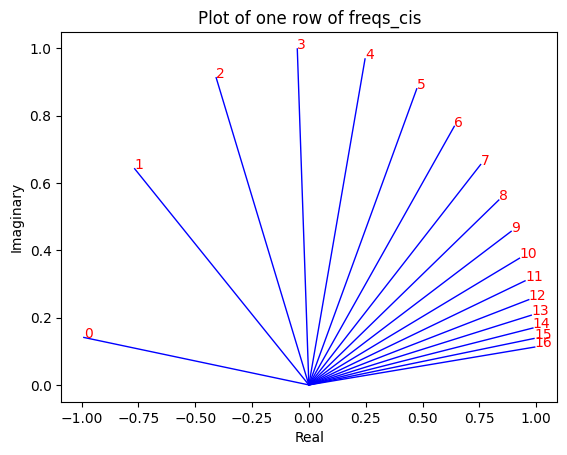

In [35]:
# viewing the third row of freqs_cis
value = freqs_cis[3]
plt.figure()
for i, element in enumerate(value[:17]):
    plt.plot([0, element.real], [0, element.imag], color='blue', linewidth=1, label=f"Index: {i}")
    plt.annotate(f"{i}", xy=(element.real, element.imag), color='red')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Plot of one row of freqs_cis')
plt.show()

now that we have a complex number (the angle change vector) for every token's query element:

we can convert our queries (the one we split into pairs) as complex numbers and then dot product to rotate the query based on the position

In [42]:
q_per_token_as_complex_numbers = torch.view_as_complex(q_per_token_split_into_pairs)
print(q_per_token_split_into_pairs.shape, q_per_token_as_complex_numbers.shape)

torch.Size([17, 64, 2]) torch.Size([17, 64])


In [46]:
q_per_token_as_complex_numbers_rotated = q_per_token_as_complex_numbers * freqs_cis
q_per_token_as_complex_numbers_rotated

tensor([[-0.0537-0.1094j,  0.3438-0.2324j,  0.3066-0.4570j,  ...,
          0.2012-0.1934j,  0.1855+0.5508j,  0.1953+0.0859j],
        [ 0.3320+0.0073j,  0.7005-0.0942j,  0.8827-0.4155j,  ...,
          0.5898+0.0645j,  0.5156+0.7188j,  0.5234+0.6602j],
        [-0.4925+0.9001j,  1.1793+2.4481j,  2.4862+1.1934j,  ...,
          0.3887-0.6797j,  0.2676+1.3516j,  0.7187+0.2451j],
        ...,
        [ 0.0283+1.1475j, -0.0516-2.8664j, -1.4180+2.3991j,  ...,
          0.4336-0.1992j, -0.0428+1.6016j,  0.5195-0.0047j],
        [-0.6673+0.3617j,  1.8879-1.7630j, -2.5859+1.0941j,  ...,
          0.6875-0.5234j,  0.7656+1.2344j,  0.5039+0.0202j],
        [-0.6491-0.1475j,  1.8734-0.1745j, -2.0168-0.4853j,  ...,
          0.4180-0.4765j,  0.5546+1.2032j,  0.7226+0.2930j]],
       grad_fn=<MulBackward0>)

In [47]:
q_per_token_as_complex_numbers

tensor([[-0.0537-0.1094j,  0.3438-0.2324j,  0.3066-0.4570j,  ...,
          0.2012-0.1934j,  0.1855+0.5508j,  0.1953+0.0859j],
        [ 0.1855-0.2754j,  0.4121-0.5742j,  0.4395-0.8711j,  ...,
          0.5898+0.0645j,  0.5156+0.7188j,  0.5234+0.6602j],
        [ 1.0234+0.0732j,  2.3750-1.3203j,  1.7578-2.1250j,  ...,
          0.3887-0.6797j,  0.2676+1.3516j,  0.7188+0.2451j],
        ...,
        [ 1.1406+0.1289j,  2.6094-1.1875j,  1.7266-2.1875j,  ...,
          0.4336-0.1992j, -0.0427+1.6016j,  0.5195-0.0047j],
        [ 0.7422+0.1592j,  2.3750-1.0156j,  1.6797-2.2500j,  ...,
          0.6875-0.5234j,  0.7656+1.2344j,  0.5039+0.0201j],
        [ 0.6641-0.0457j,  1.5938-1.0000j,  1.1953-1.6953j,  ...,
          0.4180-0.4766j,  0.5547+1.2031j,  0.7227+0.2930j]],
       grad_fn=<ViewAsComplexBackward0>)

### rotated vector is obtained
we can get back our the queries as pairs by viewing the complex numbers as real numbers again

In [52]:
q_per_token_split_into_pairs_rotated = torch.view_as_real(q_per_token_as_complex_numbers_rotated)
q_per_token_split_into_pairs_rotated.shape

torch.Size([17, 64, 2])

the rotated pairs are now merged, we now have a new query vector (rotated query vector) that is of the shape [17x128] where 17 is the number of tokens and the 128 is the dim of the query vecto

In [53]:
q_per_token_rotated = q_per_token_split_into_pairs_rotated.view(q_per_token.shape)
q_per_token_rotated.shape

torch.Size([17, 128])